In [146]:
import numpy as np
from pandas.io.parsers import read_csv

#/content/drive/MyDrive/AA/p4/data4.csv

valores=read_csv("data4.csv",header=None).to_numpy()

In [147]:
valores_ent = valores[0:80, :] #un 80% para entrenamiento y un 20% para test
valores_test = valores[80:100, :]
X = valores[:, 0:2] #[fila[0:2] for fila in valores]
Y = valores[:,2]

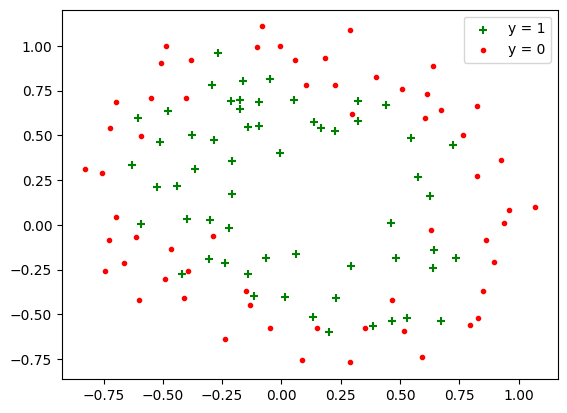

In [148]:
import matplotlib.pyplot as plt

pos = np.where(Y == 1)
plt.scatter(X[pos,0], X[pos,1], marker='+', c='g', label = "y = 1")

neg = np.where(Y == 0)
plt.scatter(X[neg,0], X[neg,1], marker='.', c='r', label = "y = 0")

plt.legend()
plt.show()


In [149]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(6)
XX = poly.fit_transform(X)

In [150]:
def func_coste(y_hat, Y, L):
    Y_resd=Y-y_hat
    return np.sum(np.dot(Y_resd.T,Y_resd))/(2*len(Y)) + L*np.sum(np.dot(w.T,w))/(2*len(Y))

def func_sigmoide(w,b,x):
    z = np.dot(x,w)+b
    return 1/(1+np.exp(-z))

def funcion_grad(X, y, w, b, L):
    y_hat = func_sigmoide(w,b,X)
    gb = (np.sum(y_hat-y))
    gw = np.dot((y_hat-y),X) + L/len(y)*w
    return gw, gb

def funcion_grad_desc(X, y, alpha, num_iter, L):
    w = np.zeros(X.shape[1])
    b = 0
    for i in range(num_iter):
        gw, gb = funcion_grad(X, y, w, b, L)
        w = w - alpha*gw
        b = b - alpha*gb
    return w, b

w, b = funcion_grad_desc(XX, Y, 0.001, 100000, 1)
w,b


(array([ 1.29260235,  2.13093389,  4.70196749, -5.5503652 , -6.68970852,
        -6.62671305,  2.00068147, -0.51867696,  2.14058452, -2.38827885,
        -4.19984101,  3.03476694, -3.48957438, -2.30084342, -5.50196243,
        -1.55301033, -0.56121835,  4.412335  , -3.40265992, -3.59762856,
         2.37455363, -5.09040901,  1.04731829, -0.88442477,  2.59586359,
        -3.77948383, -3.2380092 ,  0.29425691]),
 2.5709597612217876)

In [151]:
def funcion_prediccion(w, b, X):
    y_hat = func_sigmoide(w,b,X)
    return y_hat


y_hat = funcion_prediccion(w, b, XX)
y_h = np.where(y_hat >= 0.5, 1, 0)

print("Accuracy: ", np.sum(y_h == Y)/len(Y))

Accuracy:  0.8389830508474576


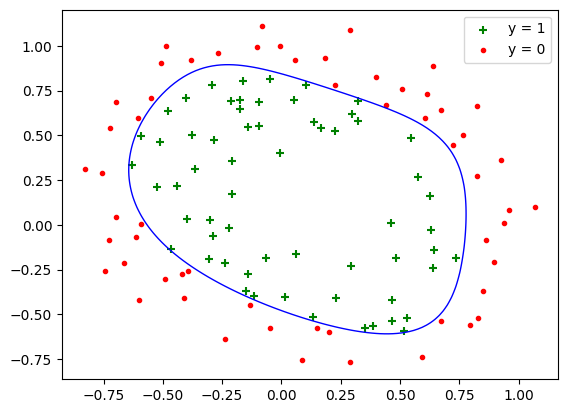

In [152]:
import matplotlib.pyplot as plt

pos = np.where(y_h == 1)
plt.scatter(X[pos,0], X[pos,1], marker='+', c='g', label = "y = 1")

neg = np.where(y_h == 0)
plt.scatter(X[neg,0], X[neg,1], marker='.', c='r', label = "y = 0")

def non_linear_decision_boundary(w, b, X):
    x1 = np.linspace(-0.75, 1.0, 100)
    x2 = np.linspace(-0.75, 1.0, 100)
    x1, x2 = np.meshgrid(x1, x2)
    X = np.c_[x1.ravel(), x2.ravel()]
    XX = poly.fit_transform(X)
    y_hat = funcion_prediccion(w, b, XX)
    y_hat = y_hat.reshape(x1.shape)
    return x1, x2, y_hat

x1, x2, y_hat = non_linear_decision_boundary(w, b, X)
plt.contour(x1, x2, y_hat, [0.5], linewidths=1, colors='b')

plt.legend()
plt.show()


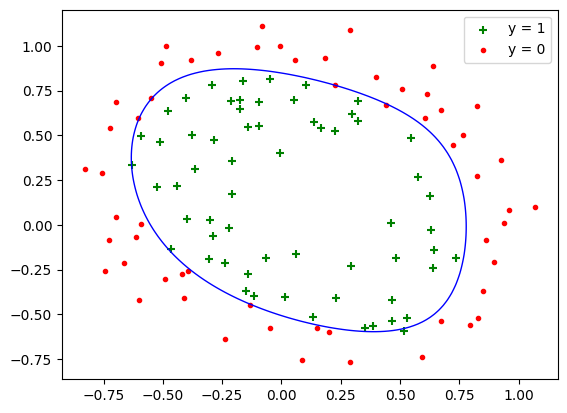

In [153]:
w,b = funcion_grad_desc(XX, Y, 0.001, 100000, 10)
y_hat = funcion_prediccion(w, b, XX)
pos = np.where(y_h == 1)
plt.scatter(X[pos,0], X[pos,1], marker='+', c='g', label = "y = 1")

neg = np.where(y_h == 0)
plt.scatter(X[neg,0], X[neg,1], marker='.', c='r', label = "y = 0")

x1, x2, y_hat = non_linear_decision_boundary(w, b, X)
plt.contour(x1, x2, y_hat, [0.5], linewidths=1, colors='b')

plt.legend()
plt.show()


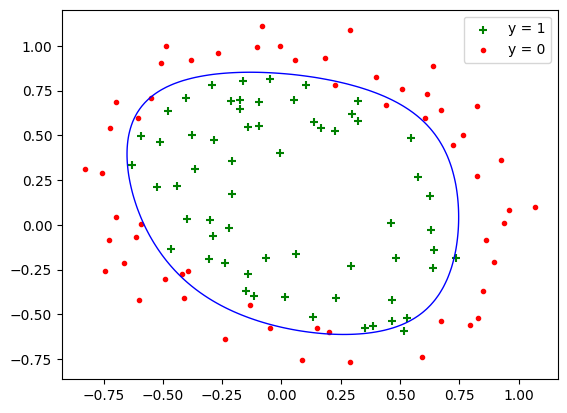

In [154]:
w,b = funcion_grad_desc(XX, Y, 0.001, 100000, 100)
y_hat = funcion_prediccion(w, b, XX)
pos = np.where(y_h == 1)
plt.scatter(X[pos,0], X[pos,1], marker='+', c='g', label = "y = 1")

neg = np.where(y_h == 0)
plt.scatter(X[neg,0], X[neg,1], marker='.', c='r', label = "y = 0")

x1, x2, y_hat = non_linear_decision_boundary(w, b, X)
plt.contour(x1, x2, y_hat, [0.5], linewidths=1, colors='b')

plt.legend()
plt.show()

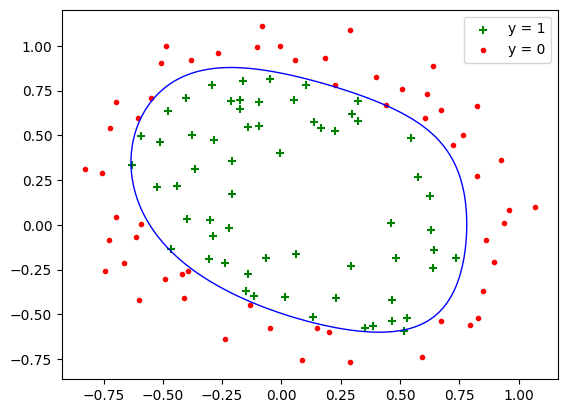

In [155]:
w,b = funcion_grad_desc(XX, Y, 0.001, 100000, 5)
y_hat = funcion_prediccion(w, b, XX)
pos = np.where(y_h == 1)
plt.scatter(X[pos,0], X[pos,1], marker='+', c='g', label = "y = 1")

neg = np.where(y_h == 0)
plt.scatter(X[neg,0], X[neg,1], marker='.', c='r', label = "y = 0")

x1, x2, y_hat = non_linear_decision_boundary(w, b, X)
plt.contour(x1, x2, y_hat, [0.5], linewidths=1, colors='b')

plt.legend()
plt.show()

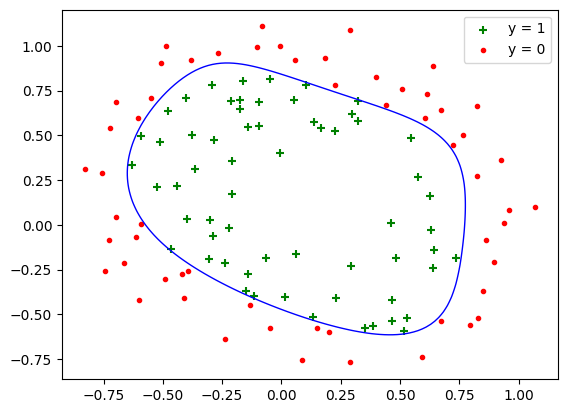

In [156]:
w,b = funcion_grad_desc(XX, Y, 0.001, 100000, 0)
y_hat = funcion_prediccion(w, b, XX)
pos = np.where(y_h == 1)
plt.scatter(X[pos,0], X[pos,1], marker='+', c='g', label = "y = 1")

neg = np.where(y_h == 0)
plt.scatter(X[neg,0], X[neg,1], marker='.', c='r', label = "y = 0")

x1, x2, y_hat = non_linear_decision_boundary(w, b, X)
plt.contour(x1, x2, y_hat, [0.5], linewidths=1, colors='b')

plt.legend()
plt.show()